<font size="4">Q1. a)</font>

$\text{Binomial  distribution  is  given  by:}$ $$ \binom{n}{x}*p^x*(1-p)^{n-x} $$

$$ n*p = \lambda 
\implies p= \frac{\lambda}{n} $$
$$ \therefore n \to \infty \implies p \to 0 $$

$$ \therefore \lim_{n \to \infty}  \binom{n}{x}*p^x*(1-p)^{n-x} =  \lim_{n \to \infty} \binom{n}{x}*\left(\frac{\lambda}{n}\right)^x*\left(1-\frac{\lambda}{n}\right)^{n-x}$$
$$ = \lim_{n \to \infty} \frac{n(n-1)(n-2)...(n-(x-1))}{x!}*\frac{\lambda^x}{n^x}*\left(1-\frac{\lambda}{n}\right)^{n}*\left(1-\frac{\lambda}{n}\right)^{-x}$$
$$ = \frac{\lambda^x}{x!} \lim_{n \to \infty} \frac{n^x[(1)(1-\frac{1}{n})...(1-(\frac{x-1}{n}))]}{n^x}*\left(1-\frac{\lambda}{n}\right)^{-x}*\left(1-\frac{\lambda}{n}\right)^n$$

$\text{Now,}  $
$$ \lim_{n \to \infty} \left(1+\frac{1}{n}\right)^n = e
\implies \lim_{n \to \infty} \left(1-\frac{\lambda}{n}\right)^n= e^{-\lambda}$$

$\text{And also,}$ $$ n \to \infty \implies \frac{n^x[(1)(1-\frac{1}{n})...(1-(\frac{x-1}{n}))]}{n^x} \to 1$$
$$ n \to \infty \implies \left(1-\frac{\lambda}{n}\right)^{-x} \to 1$$



$$ \therefore \frac{\lambda^x}{x!} \lim_{n \to \infty} \frac{n^x[(1)(1-\frac{1}{n})...(1-(\frac{x-1}{n}))]}{n^x}*\left(1-\frac{\lambda}{n}\right)^{-x}*\left(1-\frac{\lambda}{n}\right)^n = \frac{\lambda^x}{x!}*e^{-\lambda} $$

$\text{This is the PMF of Poisson distribution.}$

Plotting Poisson distribution:

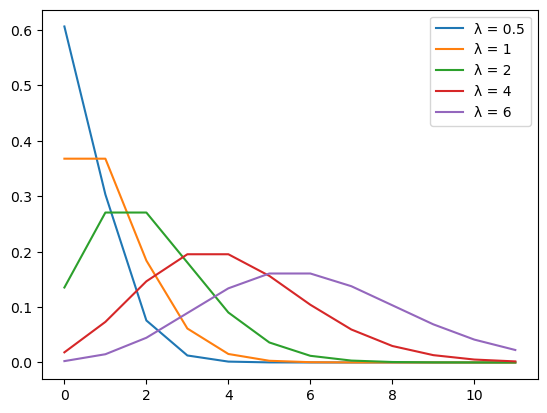

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

e=math.e
def fact(x):
    return math.factorial(int(x))

def Poisson_dist(x, l):
    return ((l**x)*(e**(-l)))/fact(x)

x_values = np.arange(0, 12) 

param=[0.5,1,2,4,6]
for l in param:
    y_values = [Poisson_dist(x, l) for x in x_values]
    plt.plot(x_values, y_values, label=f'λ = {l}')

plt.legend()
plt.show()



<font size="4">Q1. b)</font>

In [2]:
from scipy.stats import binom, poisson

def plot_distributions(n, p, x): #where x gives the no. of values you want on x-axis
    l=n*p
    
    x_values = np.arange(0, x+1)
    
    y_values1 = binom.pmf(x_values, n, p)
    y_values2 = poisson.pmf(x_values, l)
    
    plt.plot(x_values, y_values1, label='Binomial distribution')
    plt.plot(x_values, y_values2, label='Poisson distribution')
    
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Binomial vs Poisson Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()


def mse(n, p, x):
    l=n*p
    
    x_values = np.arange(0, x+1)
    
    y_values1 = binom.pmf(x_values, n, p)
    y_values2 = poisson.pmf(x_values, l)
    
    squared_errors = (y_values1 - y_values2) ** 2
    
    mse_value = np.mean(squared_errors)
    
    return mse_value

<font size="4">_(i)_</font>

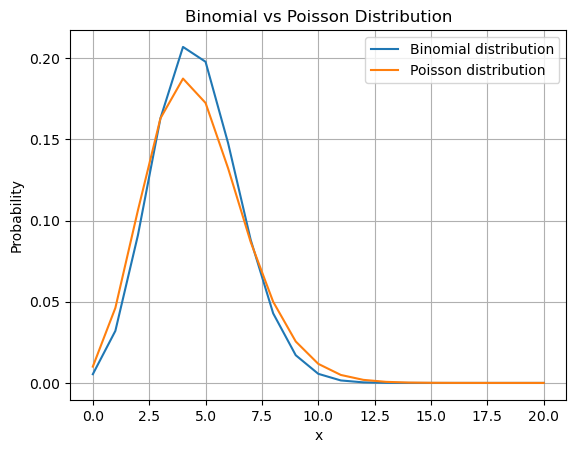

MSE: 9.047919182099222e-05


In [3]:
plot_distributions(20,0.23, 20)
print ('MSE:',mse(20,0.23, 20))

<font size="4">_(ii)_</font>

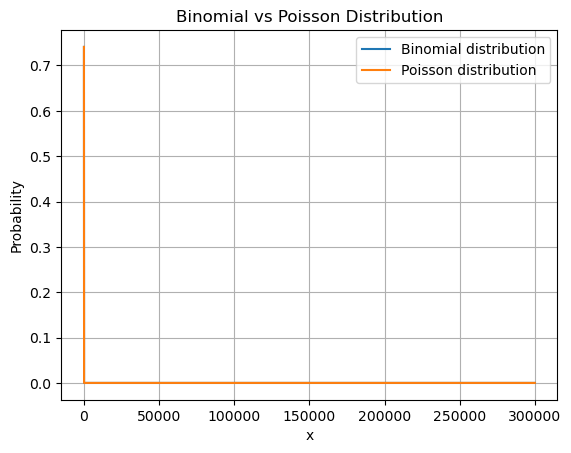

MSE: 1.7021519348243341e-19


In [4]:
plot_distributions(3*(10**5), 10**(-6), 3*(10**5))
print ('MSE:',mse(3*(10**5), 10**(-6), 3*(10**5)))

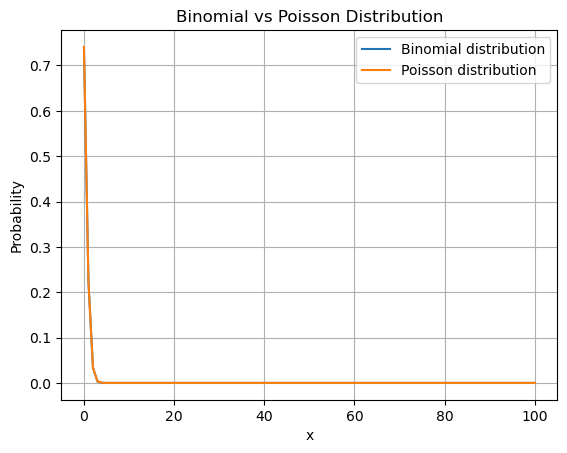

MSE: 5.055913689101338e-16


In [5]:
plot_distributions(3*(10**5), 10**(-6), 100)
print ('MSE:',mse(3*(10**5), 10**(-6), 100))

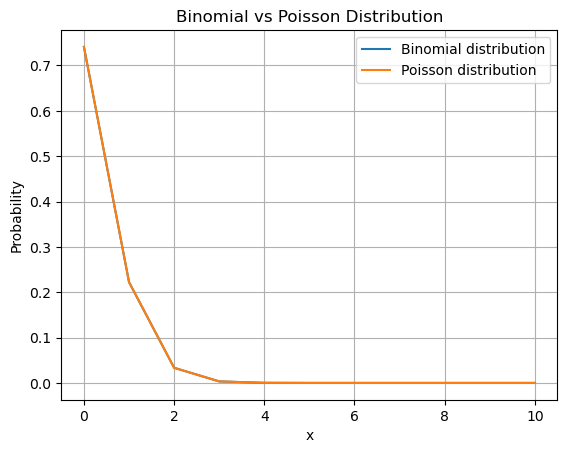

MSE: 4.6422480236294106e-15


In [6]:
plot_distributions(3*(10**5), 10**(-6), 10)
print ('MSE:',mse(3*(10**5), 10**(-6), 10))

Error in case _(ii)_ is significantly less than that in case _(i)_. 
And we can also tell from the graph that possion and binomial are coinicident in case _(ii)_.
Therefore, binomial distribution can be approximated to Poisson distribution when n $\to \infty$ and p $\to 0$ but their product is finite.

<font size="4">Q3)</font>


$ \text {From Chebyshev's inequality,} $
$$ P(\lvert X- E(X)\rvert \geq k\sigma(X)) \leq \frac {1}{k^2} $$

$ \text {We know that,} $
$$ E(\bar{X})= \mu $$
$$ Var(\bar{X}) = \frac{\sigma^2}{n} $$

$ \text {where, $\mu$ is the population mean, $\sigma$ is the population variance and n is the sample size.} $

$ \text {Therefore, from Chebyshev's inequality,} $
$$ P \left(\lvert \bar{X}- \mu\rvert \geq \frac{k\sigma}{\sqrt{n}}\right) \leq \frac {1}{k^2} $$

$\text{Let,}$ 
$$ \frac {k\sigma}{\sqrt{n}} = \epsilon $$
$$ \implies k= \frac{\epsilon \sqrt{n}}{\sigma}
\implies k^2= \frac{n\epsilon^2 }{\sigma^2} $$

$\text{Therefore, inequality becomes}$
$$ P \left(\lvert \bar{X}- \mu\rvert \geq \epsilon\right) \leq \frac {\sigma^2}{n\epsilon^2 } $$
$\text{Now, for a large sample size, i.e., n $\to \infty$ , $\frac {\sigma^2}{n\epsilon^2} \to 0$}$


$$\therefore \lim_{n \to \infty}  P \left(\lvert \bar{X}- \mu\rvert \geq \epsilon\right) = 0$$

$\text {i.e., for a large sample, sample mean converges to population mean.}$

<font size="4">Q4)</font>


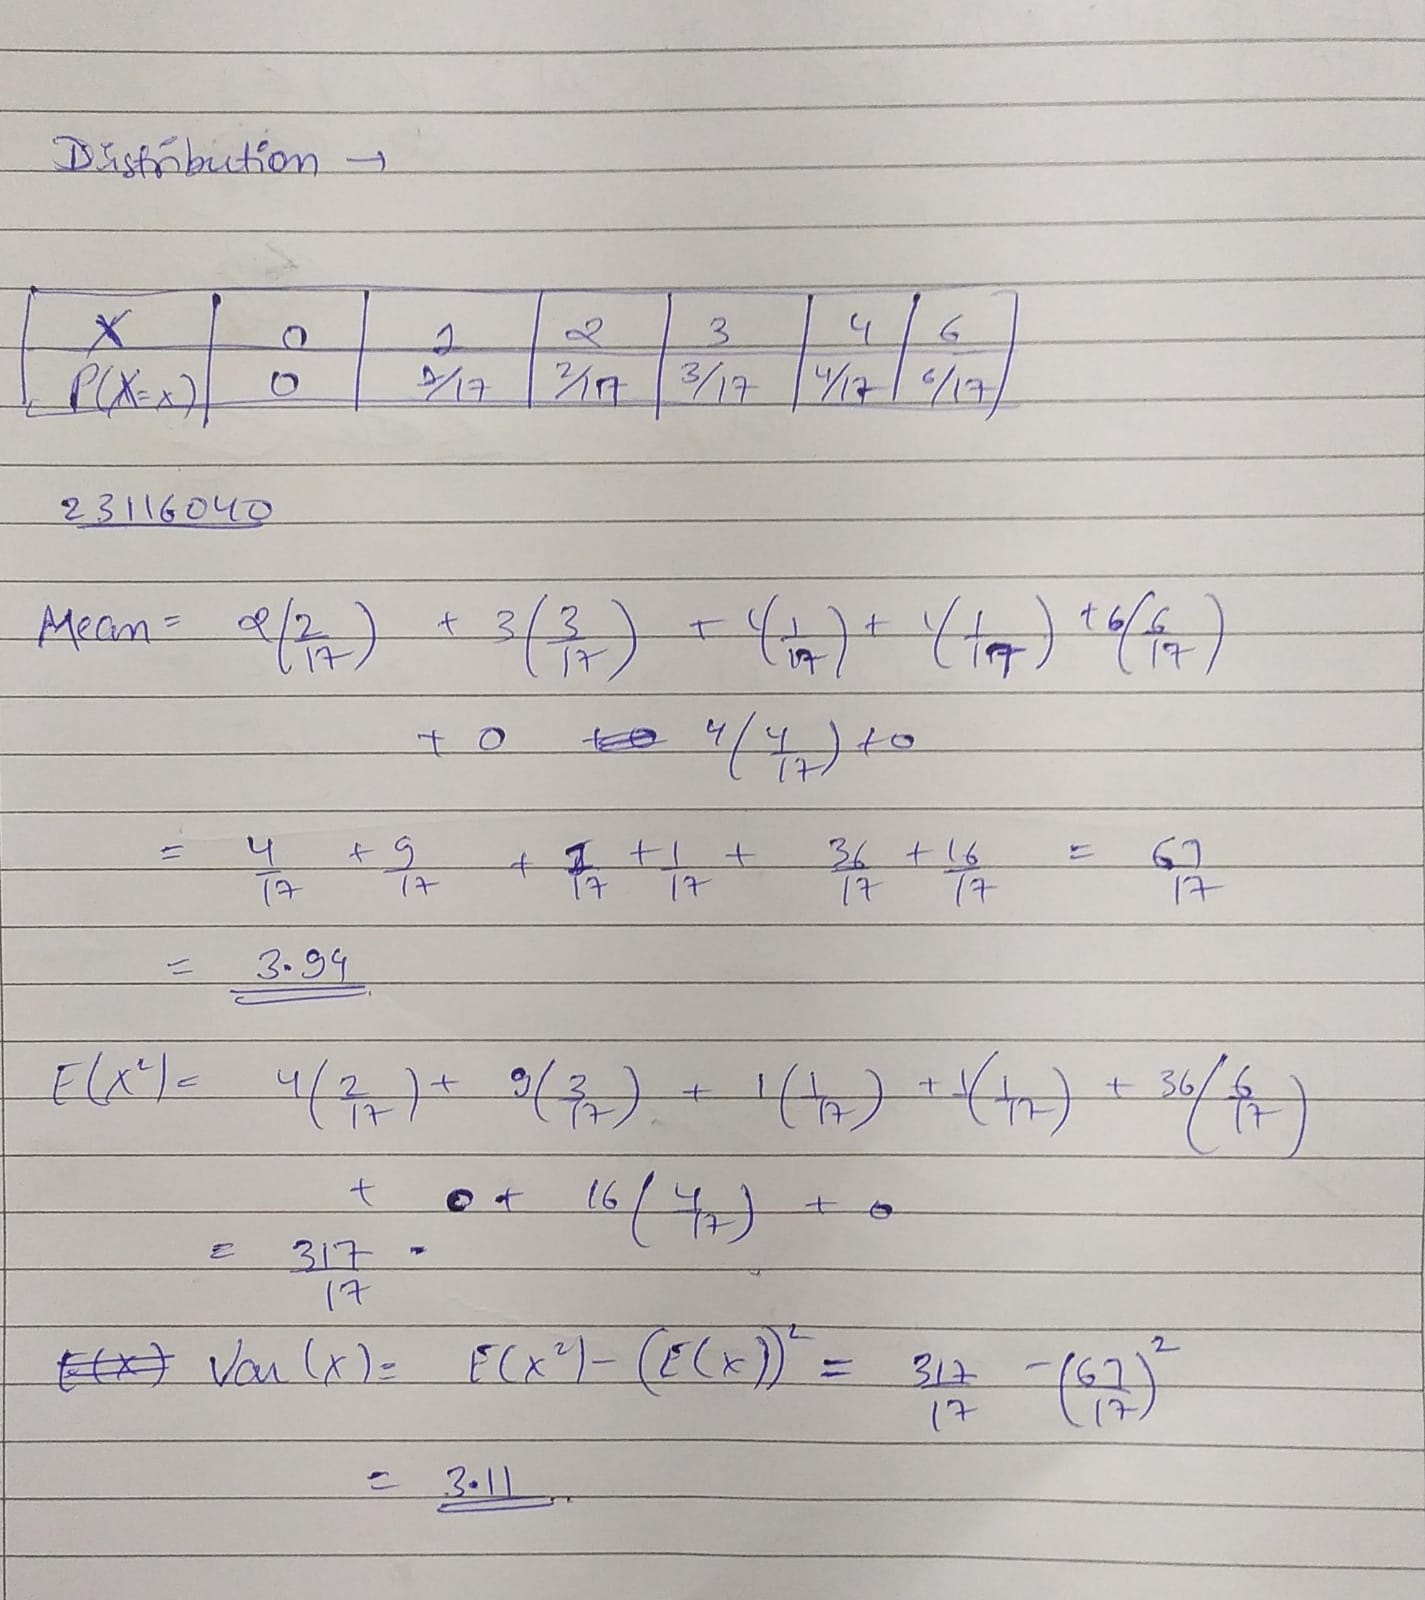

In [7]:
from IPython.display import Image
image_path = r"C:\Users\91876\OneDrive\ドキュメント\Desktop\Q4.jpg"

Image(filename=image_path)

In [8]:
arr=[2,3,1,1,6,0,4,0]
s=sum(arr)

In [9]:
prob= [i/s for i in arr]

C:\Users\91876\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


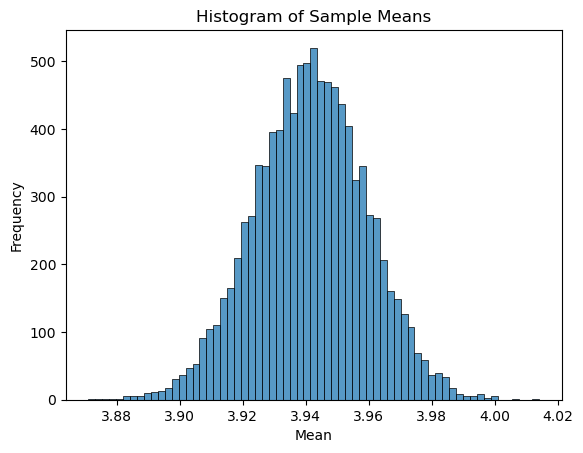

In [10]:
x= [2,3,1,1,6,0,4,0]

mean_all=[]
for i in range (10000):
    
    random_sample = np.random.choice(x,size= 10000, p=prob)
    mean= random_sample.mean()
    mean_all.append(mean)

import seaborn as sns

sns.histplot(mean_all)
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.show()

In [173]:
def getsample():
    
    random_sample = np.random.choice(x,size= 10000, p=prob)
    return random_sample

experimental_sample= [getsample() for i in range (10000)]

In [177]:
np.size(experimental_sample[1])

10000

In [180]:
exp_mean= np.mean(experimental_sample[1])
exp_var= np.var(experimental_sample[1])

In [181]:
print("Mean of experimental sapmle:" ,exp_mean)
print("Variance of experimental sample:", exp_var)

Mean of experimental sapmle: 3.9424
Variance of experimental sample: 3.1284822399999994


In [183]:
np.var(mean_all)

0.00031085118703510004

<font size="4">Q5)</font>


$$ p(x,y) =\begin{cases}
        1 & \text{if }  0\leq x < \infty, 0\leq y \leq e^{-x} \\
        0 &\text {otherwise}
        \end {cases}$$

        
$$ p(x)= \int_{0}^{e^{-x}}(1) \, dy $$
$$ \therefore p(x)= e^{-x} $$

$$ p(y)= \int_{0}^{\infty} (1) \, dx$$
$$ \therefore p(y)= \infty  $$

$ \text {Now, for x and y to be independent,}$
$$ p(x,y)= p(x)*p(y) $$

$\text {This is not satisfied in this case. }$

$\text {Therefore, x and y and not independent.} $

$$ p(y|x)= \frac {p(x,y)}{p(x)}$$
$$\therefore p(y|x)= \frac{1}{e^{-x}} = e^{x}$$

<font size="4">Q6)</font>

$$\bar{X}= 4.97  $$
$\text{For, p=0.5}$
$$ \mu_o= 10*0.5= 5 $$
$$\sigma =\sqrt{10*0.5*0.5}= \sqrt{2.5} $$
$$z= \frac{\bar{X}-\mu_o}{\frac{\sigma}{\sqrt{n}}}= \frac{(4.97-5)*\sqrt{100}}{\sqrt{2.5}}$$
$$\implies z= -0.19$$

$\text{Assuming level of significance to be 0.5 and two-sided test, for null hypothesis to be accepted,}$

$$ \lvert z\rvert \leq z_{\frac{\alpha}{2}} = 1.96$$

$\text{Hence, we fail to reject the null hypothesis. } $